In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use("seaborn")

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, matthews_corrcoef, f1_score, cohen_kappa_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [255]:
seed = 2

In [257]:
df = pd.read_csv(r"PubChemfingerprints.csv")
df

,Name,pKi,Activity,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,AUTOGEN_105 smiles_1,7.920819,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AUTOGEN_105 smiles_2,7.920819,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AUTOGEN_105 smiles_3,7.853872,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AUTOGEN_105 smiles_4,7.698970,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AUTOGEN_105 smiles_5,7.677781,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,AUTOGEN_105 smiles_101,7.772113,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,AUTOGEN_105 smiles_102,7.863279,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,AUTOGEN_105 smiles_103,7.602060,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,AUTOGEN_105 smiles_104,8.214670,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [258]:
df.shape

(105, 884)

In [259]:
df.describe()

,pKi,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
count,105.000000,105.0,105.0,105.000000,105.0,105.0,105.0,105.0,105.0,105.0,...,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0
mean,7.281185,1.0,1.0,0.990476,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.762017,0.0,0.0,0.097590,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,3.737549,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,6.080922,1.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,7.696804,1.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,8.431798,1.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,11.638272,1.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [260]:
df.head()

,Name,pKi,Activity,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,AUTOGEN_105 smiles_1,7.920819,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AUTOGEN_105 smiles_2,7.920819,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AUTOGEN_105 smiles_3,7.853872,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AUTOGEN_105 smiles_4,7.698970,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AUTOGEN_105 smiles_5,7.677781,Active,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
classes=df['Activity'].unique()
classes

array(['Active', 'Inactive'], dtype=object)

In [262]:
df["Activity"].value_counts()

Activity
Active      69
Inactive    36
Name: count, dtype: int64

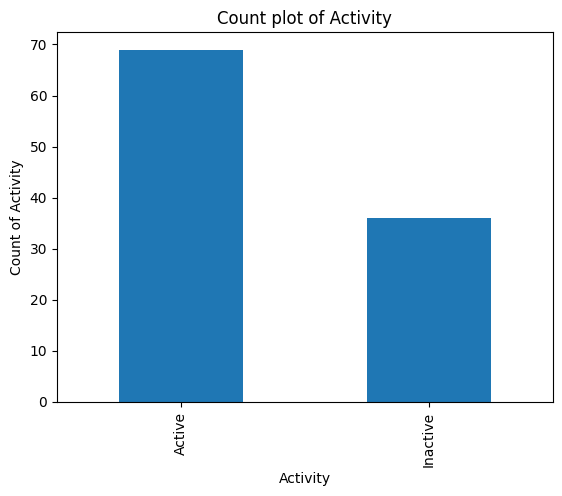

In [263]:
df['Activity'].value_counts().plot.bar()
plt.xlabel("Activity")
plt.ylabel("Count of Activity")
plt.title("Count plot of Activity")
plt.show()

In [264]:
print(df.columns)

Index(['Name', 'pKi', 'Activity', 'PubchemFP0', 'PubchemFP1', 'PubchemFP2',
       'PubchemFP3', 'PubchemFP4', 'PubchemFP5', 'PubchemFP6',
       ...
       'PubchemFP871', 'PubchemFP872', 'PubchemFP873', 'PubchemFP874',
       'PubchemFP875', 'PubchemFP876', 'PubchemFP877', 'PubchemFP878',
       'PubchemFP879', 'PubchemFP880'],
      dtype='object', length=884)


In [265]:
df.isnull().sum().sum()

0

In [266]:
df1 = df.drop(['pKi', 'Activity', 'Name'], axis=1)
df1

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
101,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
102,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
103,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [267]:
# Drop all rows with missin data
## df = df.dropna()

In [268]:
# Drop some columns which is not relevant to the analysis (they are not numeric)
## cols_to_drop = ['Name', 'Ticket', 'Cabin']
## df = df.drop(cols_to_drop, axis=1)

In [269]:
# Assuming X contains features (fingerprints) and y contains labels (WT Inhibition (%))
X = df.drop(['pKi', 'Activity', 'Name'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
101,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
102,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
103,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [270]:
Y_1= df['pKi']
Y_1

0      7.920819
1      7.920819
2      7.853872
3      7.698970
4      7.677781
         ...   
100    7.772113
101    7.863279
102    7.602060
103    8.214670
104    7.978811
Name: pKi, Length: 105, dtype: float64

In [271]:
# 2. Convert the target variable to binary labels based on the threshold
threshold = 7  # Threshold of 50%
Y = (Y_1 >= threshold).astype(int)
Y

0      1
1      1
2      1
3      1
4      1
      ..
100    1
101    1
102    1
103    1
104    1
Name: pKi, Length: 105, dtype: int32

In [272]:
Y.value_counts()

pKi
1    69
0    36
Name: count, dtype: int64

In [273]:
df.shape

(105, 884)

In [274]:
# 3. Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state= seed)

In [275]:
X_train

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
11,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
36,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
81,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
83,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
22,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
72,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [276]:
X_train.shape

(84, 881)

In [277]:
Y_train

11    0
36    0
89    0
81    1
83    1
     ..
43    1
22    0
72    1
15    0
40    1
Name: pKi, Length: 84, dtype: int32

In [278]:
Y_train.shape

(84,)

In [279]:
X_test

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
79,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
74,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
61,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
27,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
24,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
28,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [280]:
X_test.shape

(21, 881)

In [281]:
Y_test

79     0
74     1
61     1
27     0
16     0
24     0
2      1
28     1
29     1
13     0
92     1
97     1
102    1
14     0
0      1
21     0
3      1
30     1
84     1
59     1
23     0
Name: pKi, dtype: int32

In [282]:
Y_test.shape

(21,)

In [283]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(84, 881) (21, 881) (84,) (21,)


**MODEL TRAINING**

In [284]:
#Training model for pubchem fingerprint
model= KNeighborsClassifier()
model.fit(X_train, Y_train)

KNeighborsClassifier()

**TRAINING**

In [285]:
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [286]:
Y_train_pred = model.predict(X_train)

In [287]:
Y_train_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [288]:
predictions1 = pd.DataFrame({'Y_train' : Y_train, 'Y_train_pred' : Y_train_pred})
predictions1

,Y_train,Y_train_pred
11,0,1
36,0,0
89,0,0
81,1,1
83,1,1
...,...,...
43,1,1
22,0,0
72,1,1
15,0,0


In [289]:
train_data = X_train.copy()
train_data['PRED_Activity'] = model.predict(X_train)
train_data

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,PRED_Activity
11,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
36,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
81,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
83,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
22,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
72,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
15,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [290]:
# 6. Determine which molecules are active and which are not based on the predictions and the set threshold
active_molecules = X_train[Y_train_pred == 1]  # Molecules predicted as active
inactive_molecules = X_train[Y_train_pred == 0]  # Molecules predicted as inactive

In [291]:
active_molecules

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
11,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
81,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
83,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
35,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
82,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
43,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
72,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [292]:
inactive_molecules

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
36,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
25,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
94,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
48,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
91,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**TESTING**

In [293]:
Y_test_pred = model.predict(X_test)

In [294]:
Y_test_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [295]:
predictions1 = pd.DataFrame({'Y_test' : Y_test, 'Y_test_pred' : Y_test_pred})
predictions1

,Y_test,Y_test_pred
79,0,1
74,1,1
61,1,1
27,0,0
16,0,0
24,0,1
2,1,1
28,1,0
29,1,0
13,0,0


In [296]:
test_data = X_test.copy()
test_data['PRED_Activity'] = model.predict(X_test)
test_data

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,PRED_Activity
79,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
74,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
61,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
27,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
24,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
28,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [297]:
# 6. Determine which molecules are active and which are not based on the predictions and the set threshold
active_molecules = X_test[Y_test_pred == 1]  # Molecules predicted as active
inactive_molecules = X_test[Y_test_pred == 0]  # Molecules predicted as inactive

In [298]:
active_molecules

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
79,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
74,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
61,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
24,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
97,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
102,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
30,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
84,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [299]:
inactive_molecules

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
27,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
28,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
92,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
23,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


** italicized textPERFORMANCE METRICS FOR TRAIN DATA**

In [300]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.58      0.39      0.47        28
           1       0.74      0.86      0.79        56

    accuracy                           0.70        84
   macro avg       0.66      0.62      0.63        84
weighted avg       0.69      0.70      0.68        84



In [301]:
def evaluate_classifier(Y_train, Y_train_pred):
  print(f"Accuracy: {accuracy_score(Y_train, Y_train_pred):.4f}")
  print(f"Precision: {precision_score(Y_train, Y_train_pred):.4f}")
  print(f"Recall: {recall_score(Y_train, Y_train_pred):.4f}")
  print(f"ROC AUC: {roc_auc_score(Y_train, Y_train_pred):.4f}")
  print(f"balanced_accuracy: {balanced_accuracy_score(Y_train, Y_train_pred):.4f}")
  print(f"mcc: {matthews_corrcoef(Y_train, Y_train_pred):.4f}")
  print(f"f1: {f1_score(Y_train, Y_train_pred):.4f}")
  print(f"cohen_kappa: {cohen_kappa_score(Y_train, Y_train_pred):.4f}")
  print(f"conf_matrix: {confusion_matrix(Y_train, Y_train_pred)}")

In [302]:
evaluate_classifier(Y_train, Y_train_pred)

Accuracy: 0.7024
Precision: 0.7385
Recall: 0.8571
ROC AUC: 0.6250
balanced_accuracy: 0.6250
mcc: 0.2817
f1: 0.7934
cohen_kappa: 0.2718
conf_matrix: [[11 17]
 [ 8 48]]


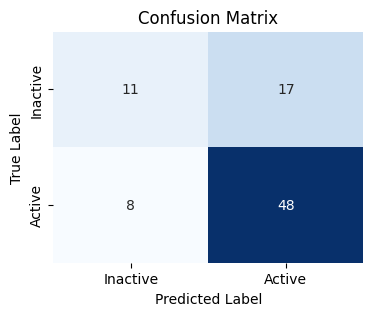

In [303]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_train, Y_train_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [304]:
def plot_roc(Y_train,Y_train_pred):
    fpr,tpr,threshold=roc_curve(Y_train,Y_train_pred)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.4f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.4f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()

In [305]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

ROC AUC=0.6250


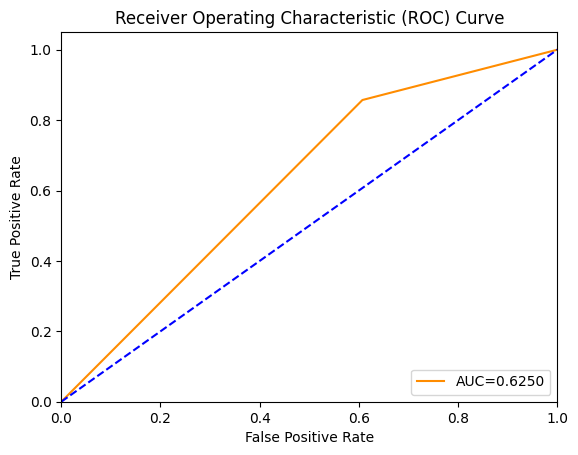

In [306]:
plot_roc(Y_train,Y_train_pred)

In [307]:
## Sensitivity = TP/(TP+FN)
## SPECIFICITY = TN/(TN+FP)
## Positive Predictive Value (PPV) = TP/(TP+FP)
## Negative Predictive Value (NPV) = TN/(TN+FN)
## FPR = FP/(TN+FP)
## NPV = TN/(TN+FN)

In [308]:
cm = confusion_matrix(Y_train, Y_train_pred)

In [309]:
cm

array([[11, 17],
       [ 8, 48]], dtype=int64)

In [310]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

In [311]:
# Print Confusion Matrix
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

TP: 11
TN: 48
FP: 17
FN: 8


In [312]:
## Sensitivity = TP/(TP+FN)
Sensitivity = TP/(TP+FN)

In [313]:
Sensitivity

0.5789473684210527

In [314]:
## SPECIFICITY = TN/(TN+FP)
SPECIFICITY = TN/(TN+FP)

In [315]:
SPECIFICITY

0.7384615384615385

In [316]:
## Positive Predictive Value (PPV) = TP/(TP+FP)
PPV = TP/(TP+FP)


In [317]:
PPV

0.39285714285714285

In [318]:
## Negative Predictive Value (NPV) = TN/(TN+FN)
NPV = TN/(TN+FN)


In [319]:
NPV

0.8571428571428571

In [320]:
## False Positive Rate (FPR) = FP/(TN+FP)
FPR = FP/(TN+FP)

In [321]:
FPR

0.26153846153846155

In [322]:
accuracy = (TP+TN)/(TP+TN+FP+FN)

In [323]:
accuracy

0.7023809523809523

In [324]:
def calculate_tpr_fpr(Y_train, Y_train_pred):
  cm = confusion_matrix(Y_train, Y_train_pred)
  TP = cm[0, 0]
  TN = cm[1, 1]
  FP = cm[0, 1]
  FN = cm[1, 0]


  tpr =  TP/(TP + FN)
  fpr = 1 - TN/(TN+FP)

  return tpr, fpr

In [325]:
fpr, tpr, thresholds = roc_curve(Y_train, Y_train_pred)
auc(fpr, tpr)

0.625

**PERFORMANCE METRICS FOR TEST DATA**

In [326]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.73      0.62      0.67        13

    accuracy                           0.62        21
   macro avg       0.61      0.62      0.61        21
weighted avg       0.64      0.62      0.62        21



In [327]:
def evaluate_classifier(Y_test, Y_test_pred):
  print(f"Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
  print(f"Precision: {precision_score(Y_test, Y_test_pred):.4f}")
  print(f"Recall: {recall_score(Y_test, Y_test_pred):.4f}")
  print(f"ROC AUC: {roc_auc_score(Y_test, Y_test_pred):.4f}")
  print(f"balanced_accuracy: {balanced_accuracy_score(Y_test, Y_test_pred):.4f}")
  print(f"mcc: {matthews_corrcoef(Y_test, Y_test_pred):.4f}")
  print(f"f1: {f1_score(Y_test, Y_test_pred):.4f}")
  print(f"cohen_kappa: {cohen_kappa_score(Y_test, Y_test_pred):.4f}")
  print(f"conf_matrix: {confusion_matrix(Y_test, Y_test_pred)}")

In [328]:
evaluate_classifier(Y_test, Y_test_pred)

Accuracy: 0.6190
Precision: 0.7273
Recall: 0.6154
ROC AUC: 0.6202
balanced_accuracy: 0.6202
mcc: 0.2337
f1: 0.6667
cohen_kappa: 0.2294
conf_matrix: [[5 3]
 [5 8]]


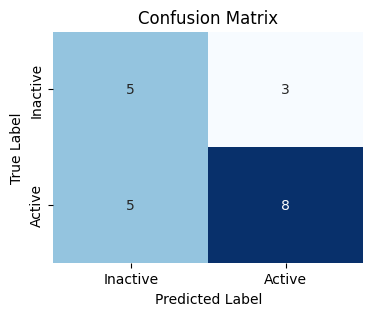

In [329]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_test_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [330]:
def plot_roc(Y_test, Y_test_pred):
    fpr,tpr,threshold=roc_curve(Y_test, Y_test_pred)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.4f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.4f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()

ROC AUC=0.6202


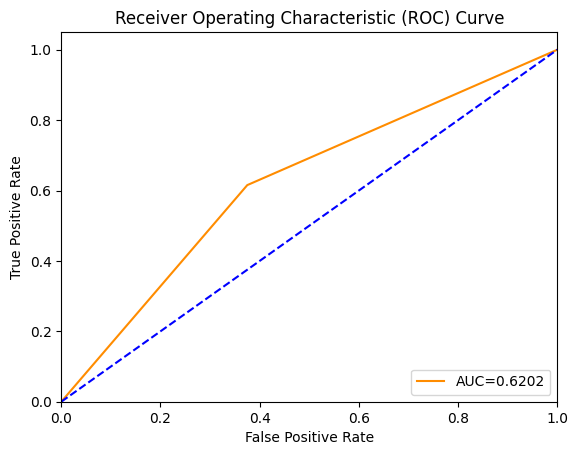

In [331]:
plot_roc(Y_test, Y_test_pred)

In [332]:
## Sensitivity = TP/(TP+FN)
## SPECIFICITY = TN/(TN+FP)
## Positive Predictive Value (PPV) = TP/(TP+FP)
## Negative Predictive Value (NPV) = TN/(TN+FN)
## FPR = FP/(TN+FP)
## NPV = TN/(TN+FN)

In [333]:
cm1 = confusion_matrix(Y_test, Y_test_pred)

In [334]:
cm1

array([[5, 3],
       [5, 8]], dtype=int64)

In [335]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

In [336]:
# Print Confusion Matrix
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

TP: 11
TN: 48
FP: 17
FN: 8


In [337]:
## Sensitivity = TP/(TP+FN)
Sensitivity = TP/(TP+FN)

In [338]:
Sensitivity

0.5789473684210527

In [339]:
## SPECIFICITY = TN/(TN+FP)
SPECIFICITY = TN/(TN+FP)

In [340]:
SPECIFICITY

0.7384615384615385

In [341]:
## Positive Predictive Value (PPV) = TP/(TP+FP)
PPV = TP/(TP+FP)

In [342]:
PPV

0.39285714285714285

In [343]:
## Negative Predictive Value (NPV) = TN/(TN+FN)
NPV = TN/(TN+FN)

In [344]:
NPV

0.8571428571428571

In [345]:
## False Positive Rate (FPR) = FP/(TN+FP)
FPR = FP/(TN+FP)

In [346]:
FPR

0.26153846153846155

In [347]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_pred)
auc(fpr, tpr)

0.6201923076923077

In [348]:
my_param_grid = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [349]:
from sklearn.model_selection import GridSearchCV

In [350]:
GridSearchCV(estimator=KNeighborsClassifier(), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [351]:
grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

In [352]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.529 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.647 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.588 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.706 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.438 total time=   0.0s
[CV 1/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.706 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.706 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.588 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.647 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.375 to

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [353]:
grid.best_params_

{'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'distance'}

In [354]:
Y_test_optimised = grid.predict(X_test)

In [355]:
Y_test_optimised

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0])

In [356]:
predictions1['Y_test_optimised'] = Y_test_optimised
predictions1.head()

,Y_test,Y_test_pred,Y_test_optimised
79,0,1,0
74,1,1,1
61,1,1,1
27,0,0,1
16,0,0,1


**PERFORMANCE METRICS FOR OPTIMIZED DATA**

In [357]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_optimised))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.85      0.85      0.85        13

    accuracy                           0.81        21
   macro avg       0.80      0.80      0.80        21
weighted avg       0.81      0.81      0.81        21



In [358]:
def evaluate_classifier(Y_test, Y_test_optimised):
  print(f"Accuracy: {accuracy_score(Y_test, Y_test_optimised):.4f}")
  print(f"Precision: {precision_score(Y_test, Y_test_optimised):.4f}")
  print(f"Recall: {recall_score(Y_test, Y_test_optimised):.4f}")
  print(f"ROC AUC: {roc_auc_score(Y_test, Y_test_optimised):.4f}")
  print(f"balanced_accuracy: {balanced_accuracy_score(Y_test, Y_test_optimised):.4f}")
  print(f"mcc: {matthews_corrcoef(Y_test, Y_test_optimised):.4f}")
  print(f"f1: {f1_score(Y_test, Y_test_optimised):.4f}")
  print(f"cohen_kappa: {cohen_kappa_score(Y_test, Y_test_optimised):.4f}")
  print(f"conf_matrix: {confusion_matrix(Y_test, Y_test_optimised)}")

In [359]:
evaluate_classifier(Y_test, Y_test_optimised)

Accuracy: 0.8095
Precision: 0.8462
Recall: 0.8462
ROC AUC: 0.7981
balanced_accuracy: 0.7981
mcc: 0.5962
f1: 0.8462
cohen_kappa: 0.5962
conf_matrix: [[ 6  2]
 [ 2 11]]


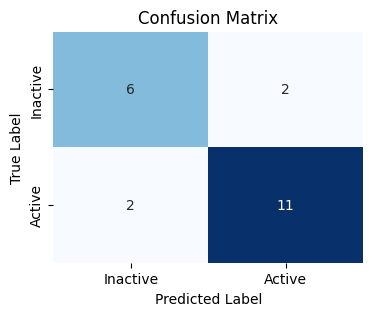

In [360]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_test_optimised)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_knn.png', dpi=300, bbox_inches='tight')  
plt.show()

In [361]:
def plot_roc(Y_test, Y_test_optimised):
    fpr,tpr,threshold=roc_curve(Y_test, Y_test_optimised)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.4f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.4f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.savefig('roccurve_knn.png', dpi=300, bbox_inches='tight')  
    plt.show()

ROC AUC=0.7981


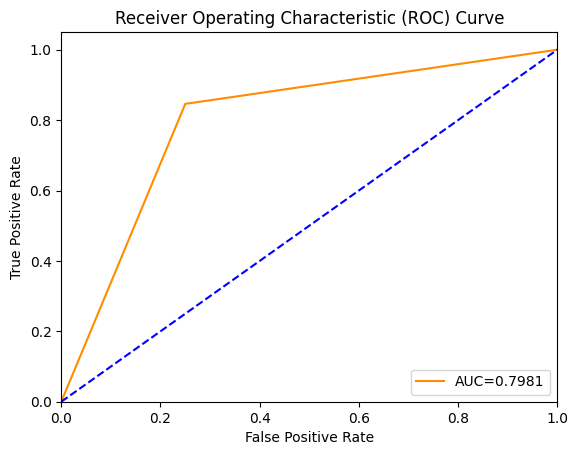

In [362]:
plot_roc(Y_test, Y_test_optimised)

In [363]:
## Sensitivity = TP/(TP+FN)
## SPECIFICITY = TN/(TN+FP)
## Positive Predictive Value (PPV) = TP/(TP+FP)
## Negative Predictive Value (NPV) = TN/(TN+FN)
## FPR = FP/(TN+FP)
## NPV = TN/(TN+FN)

In [364]:
cm1 = confusion_matrix(Y_test, Y_test_optimised)

In [365]:
cm1

array([[ 6,  2],
       [ 2, 11]], dtype=int64)

In [366]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

In [367]:
# Print Confusion Matrix
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

TP: 11
TN: 48
FP: 17
FN: 8


In [368]:
## Sensitivity = TP/(TP+FN)
Sensitivity = TP/(TP+FN)

In [369]:
Sensitivity

0.5789473684210527

In [370]:
## SPECIFICITY = TN/(TN+FP)
SPECIFICITY = TN/(TN+FP)

In [371]:
SPECIFICITY

0.7384615384615385

In [372]:
## Positive Predictive Value (PPV) = TP/(TP+FP)
PPV = TP/(TP+FP)

In [373]:
PPV

0.39285714285714285

In [374]:
## Negative Predictive Value (NPV) = TN/(TN+FN)
NPV = TN/(TN+FN)

In [375]:
NPV

0.8571428571428571

In [376]:
## False Positive Rate (FPR) = FP/(TN+FP)
FPR = FP/(TN+FP)

In [377]:
FPR

0.26153846153846155

In [378]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_optimised)
auc(fpr, tpr)

0.798076923076923